# Numpy TP3

#### Monday,  October 12, 2020

## Linear Algebra

Given three 2-D matrices (A, B and C) and two vectors (V and W)

$$
A = \begin{bmatrix}
1 &  2 & 3\\ 
4 & -5 & 6 \\ 
7 &  8 & 9 \\
\end{bmatrix} \quad ; \quad
B = \begin{bmatrix}
1 &  2 & 3\\ 
-4 & -5 & -6 \\ 
7 &  8 & 9 \\
\end{bmatrix} \quad ; \quad
C = \begin{bmatrix}
1 &  2 & 3\\ 
4 & -5 & 6 \\ 
7 &  8 & 9 \\
0 &  1 & -2 \\
\end{bmatrix} 
$$

$$
V = \begin{bmatrix}
2 & 4 & -10  \\
\end{bmatrix}\quad ; \quad
W = \begin{bmatrix}
2 \\ 
4  \\ 
-10  \\
\end{bmatrix} 
$$

In [1]:
import numpy as np


### Numpy array constructor

In [2]:
# create the 2-D matrices: a, b and the vectors v and w
# Matrices
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A[1,1] = - A[1,1]

B = A
B[1,:] = -A[1,:]
B[1,1] = - B[1,1]

# Vectors
v = np.array([[2,4,-10]])
w = np.array([[2],[4],[-10]])

# print them
print(A)
print(B)

print(v)
print(w)              


[[ 1  2  3]
 [-4 -5 -6]
 [ 7  8  9]]
[[ 1  2  3]
 [-4 -5 -6]
 [ 7  8  9]]
[[  2   4 -10]]
[[  2]
 [  4]
 [-10]]


In [3]:
# verify the shape of a, v and w
print(A.shape, v.shape, w.shape)

(3, 3) (1, 3) (3, 1)


In [4]:
# verify the data type of a
print(A.dtype)

int32


### Element-wise and matrix operations

In [5]:
# analyse the differences between
# v*w
r1 = v*w

# np.dot(v,w)
r2 = np.dot(v,w)

# np.dot(w,v)
r3 = np.dot(w,v)

# Displaying results
print(r1)
print(r2)
print(r3)

[[  4   8 -20]
 [  8  16 -40]
 [-20 -40 100]]
[[120]]
[[  4   8 -20]
 [  8  16 -40]
 [-20 -40 100]]


Two of the calculations provide the usual matrix multiplication.
One is therfore the scalar product, whil the other are matrices multiplications.

Therefore, the product * works as the usual product sign
The np.dot function however works either as a a scalar product or a matriw multiplication. 

In [6]:
# analyse the differences between
# a*b
r1 = A*B

# np.dot(a,b)
r2 = np.dot(A,B)

# Displaying results
print(r1)
print(r2)

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 14  16  18]
 [-26 -31 -36]
 [ 38  46  54]]


Quiet naturally, we see that the * sign acts as for matrice multiplicaton that one could obtain by hand, while the np.dot function multiply only element at a position by element at the same position.

In [7]:
# create the 2-D matrix: c
C = np.array([[1,2,3],[4,-5,6],[7,8,9],[0,1,-2]])

# compute b . c and c . b
#r1 = np.dot(B,C)
r2 = np.dot(C,B)

# Displaying results
#print(r1)
print(r2)

[[ 14  16  18]
 [ 66  81  96]
 [ 38  46  54]
 [-18 -21 -24]]


Matrices' shape are such that the matrix product between C (4x3) and B(3x3) isnt' possible.
The inverse is though.

In [8]:
# take the three uppe lines of matrix c to compute b . c
print("B . C[0:3,:] = ", np.dot(B, C[0:3,:]))

B . C[0:3,:] =  [[ 30  16  42]
 [-66 -31 -96]
 [102  46 150]]


### Solving a linear system with linalg from scipy

In [9]:
# import linalg and print the manual for linalg
from scipy import linalg as algl

algl?

In [10]:
# solve a x = w
x = algl.solve(A, w)

print(x)

[[ 0.2]
 [-8.4]
 [ 6.2]]


<ipython-input-10-ad88e37a0c27>:2: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = algl.solve(A, w)


In [11]:
# solve a x = v (do not hesitate to take a transpose if necessary)
x = algl.solve(A, v.T)

print(x)

[[ 0.2]
 [-8.4]
 [ 6.2]]


<ipython-input-11-67bf1c39a215>:2: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = algl.solve(A, v.T)


In [12]:
# Compute the inverse of a to solve a x = v 

x = np.dot(algl.inv(A), v.T)

print(x)

[[-1.]
 [-6.]
 [ 3.]]


### Execution CPU time

In [13]:
# create a random vector av of length N=10 using np.random.random

N = 10

# np.random?
av = np.random.random(N)

# verify the length, the shape and the type of av

len(av)
print(av.shape, type(av[0]))

(10,) <class 'numpy.float64'>


In [14]:
# create a function mysum which sums all vector's elements of av

In [15]:
def mysum(av):
    """
     The function mysum adds up arbitrary
     number form av to restitute the sum of it
     sum : float
    """
    sum = 0
    for i in range(np.size(av)):
        sum += av[i]
    return(sum)

r1 = mysum(av)

# Displaying results
print(r1)

4.585027843001216


In [16]:
# import the time function from the time library
from time import time

#time?
# using time function, compare the executing time of
# mysum and np.sum 

print("Time for mysum to execute = ".format(mysum(av)))
print("Time for np.sum to execute = ".format(np.sum(av)))

Time for mysum to execute = 
Time for np.sum to execute = 


In [17]:
# create a random vector av(N) of length N=1e5 
# for N=10, 1e3, 1e5, 1e6, 1e7, 1e8 ... depending the processors (CPU) performances of your laptop.

N  = int(1e8)
av = np.random.random(N)

# compute the execution time
t  = time()    # time before calculation
s  = np.sum(av) # time after calculation (it registers the time nedded to do the calculation)
t1 = time() - t
print(s)

print("optimized python function np.sum", t1, "secondes")

# ------------------------------------------------------------------

t  = time()    # time before calculation
s  = mysum(av) # time after calculation (it registers the time nedded to do the calculation)
t2 = time() - t
print(s)

print("optimized python function mysum", t1, "secondes")

# ------------------------------------------------------------------

# calculate the flops (floating point operations per second) for the addition 
print("+", "{:.2%}".format((t2 - t1)/t1))
print("mysum flops", '{:03.2g}'.format(N/t2), 'for "+"')

49999455.515154466
optimized python function np.sum 0.11672210693359375 secondes
49999455.51514989
optimized python function mysum 0.11672210693359375 secondes
+ 19141.64%
mysum flops 4.5e+06 for "+"


In [20]:
N = int(1e3) # +2 accounts for the limits
av = np.random.random(N)
diff = np.zeros(N)
t = time()
for j in range(1, N-1): # to not be out of the table's limits
    diff[j] = av[j+1] - av[j-1]
t1 = time() - t

print("time", t1, "secondes")

# ------------------------------------------------------------------

# print the last non-zero value of the vector diff

print("diff(N-1) = ", diff[-2])

time 0.0009975433349609375 secondes
diff(N-1) =  -0.2915832438940401


In [21]:
t = time()
diff[1:-1] = av[2:] - av[:-2]
t2 = time() - t

print("time", t2, "secondes")
print("diff(N-1) = ", diff[-2])
print("element-wise against vectorized loop : ", '{:.2%}'.format((t1-t2)/t2))

time 0.0 secondes
diff(N-1) =  -0.2915832438940401


ZeroDivisionError: float division by zero

### Estimating $\pi$ using the Monte Carlo Method

In [64]:
# create a random matrix ([x,y]) of dimension 2 and length N = 1e3

N = int(10)

# random matrix
([x,y]) = np.random.random((2, N))
print(x, y)

[0.34815292 0.29752074 0.04090625 0.82917448 0.82422222 0.22278371
 0.01647868 0.01590126 0.70882671 0.66058558] [0.43587809 0.75670586 0.33261481 0.2404016  0.58578019 0.5242517
 0.70242642 0.04443164 0.98820579 0.75038319]


There are  796 + 796 = 1592 points inside the circle


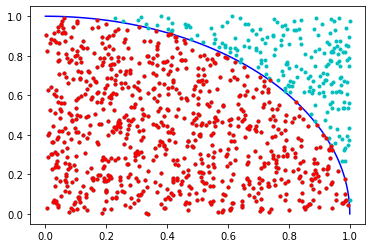

In [62]:
# count the points inside of the 1/4 circle of radius 1 and center (0,0)

# center
x0, y0 = [0, 0]

# angle
theta = np.linspace(0, 2*np.pi/4, 100)

# radius
r = 1

# circle equation
xx = r*np.cos(theta)
yy = r*np.sin(theta)

There are  791 + 791 = 1582 points inside the circle


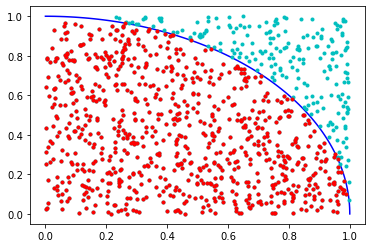

In [68]:
import matplotlib.pyplot as plt

N = int(1e3)

# random matrix
([x,y]) = np.random.random((2, N))

# -----------------------------------------------------------------

# ploting circle
plt.plot(xx, yy, 'b-')

# conditions c to differentiate points inside the circle from points outside of it
c = (x**2 + y**2) < r**2

# random points & circle altogether
plt.plot(x, y, 'c.')         # putting every points in red
plt.plot(x[c], y[c], 'r.') # hihlighting the points inside the circle

inside_x = len(x[c])
inside_y = len(y[c])
inside_total = inside_x + inside_y

print("There are ", str(inside_x), "+", str(inside_y), "=", str(inside_total),"points inside the circle")

In [79]:
# compute the ratio of the points within the circle to the total number of points

total_point = np.size(x)*np.size(y)

print("There are", str(inside_total), "points inside and ", str(total_point), "in total, thus a ratio inside/outside of", '{:.2%}'.format(inside_total/total_point*100))


There are 1582 points inside and  1000000 in total, thus a ratio inside/outside of 15.82%


In [95]:
# write a function calculPi(N) that returns two vectors (n,pi_arr(n)) 
# with n=[1:N] and pi_arr an approximation of pi

pi_arr = np.zeros(N)

def calculPi (N):
    for n in range(N):
        pi_arr[n] = 2
    return (n, pi_arr)
    
calculPi(10)

(9,
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

In [ ]:
# plot the evolution of the pi approximation with n, and the error for N=1000



## Introduction to sparse matrix

Given the sparse matrices (A) 

$$
A = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0\\ 
0 & 0 & 2 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 2 & 0 & 0 \\
\end{bmatrix}
$$

In [ ]:
# Sparse matrices contain only a few non-zero values 
# to save spave, we use sparse matrix by comparing with dense matrix.
#
# import sparse library from scipy
# create a dense matrix A, and print A


In [ ]:
# convert A to a sparse matrix representation (S) using the function csc_matrix from scipy
# explore the contain of the new matrix with S.data


In [ ]:
# Use S.todense to retrieve A
# print the result


In [ ]:
# Do a graph  with S, using plt.spy


# Take a look at
https://docs.scipy.org/doc/scipy/reference/sparse.html